In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from glob import glob
from mapFunctions import getMap

3.2016551210326264e-05
0.00010363984738272169


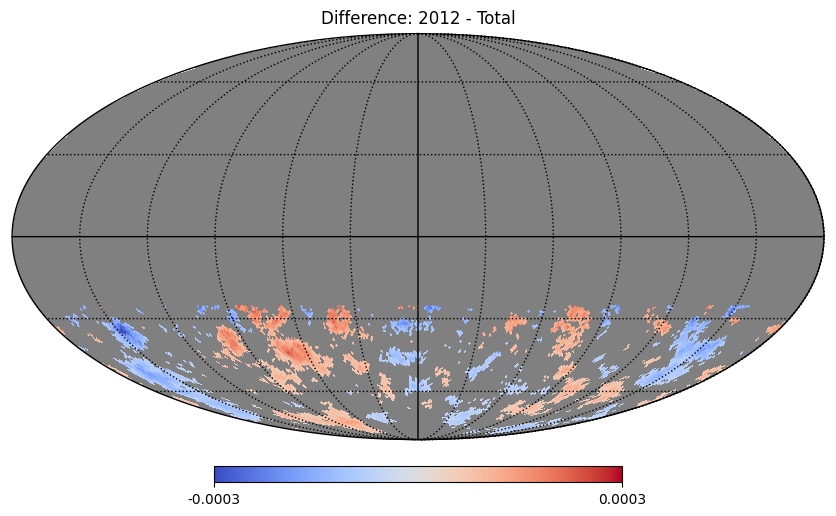

3.1383845279368914e-05
0.00010161943915862437


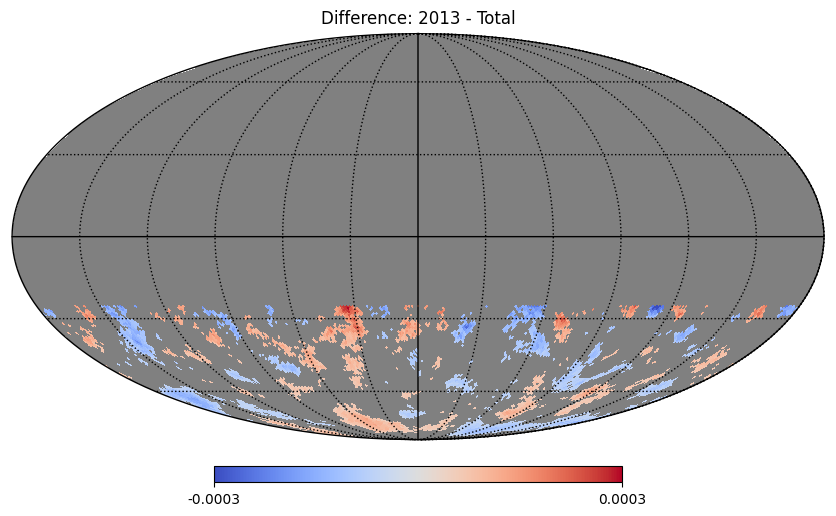

3.1389705963660096e-05
0.00010159045531713273


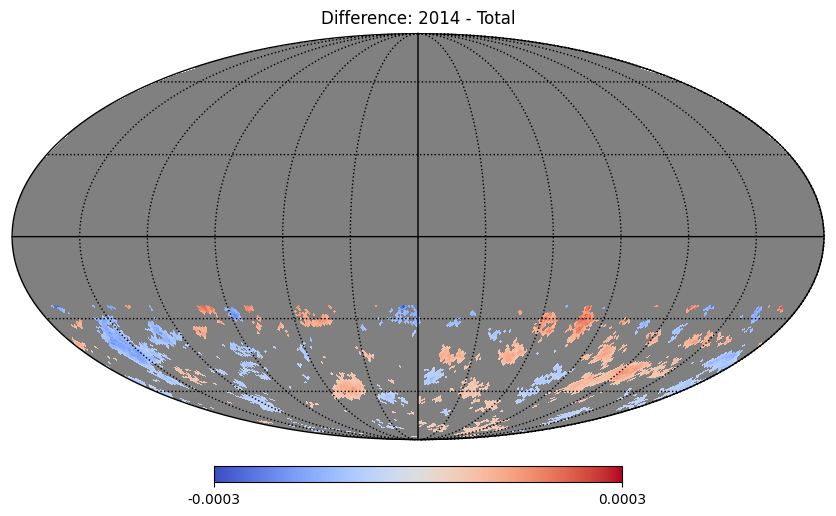

3.315644856317293e-05
0.00010531474250905472


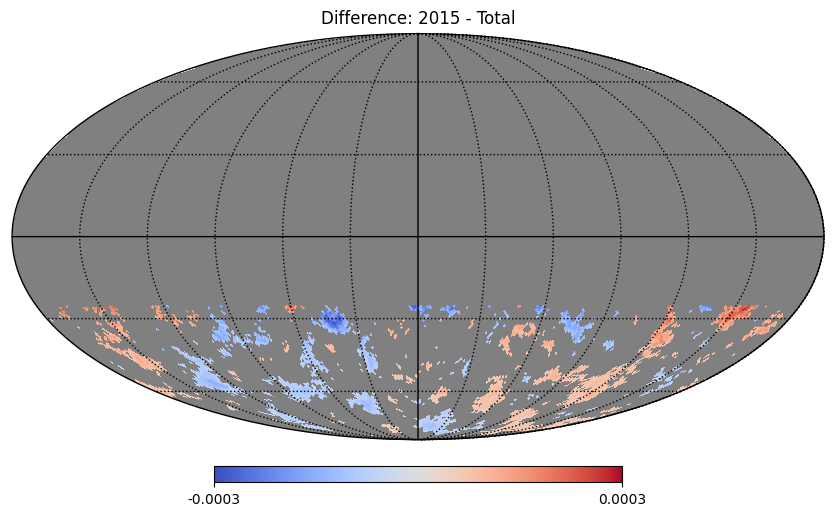

3.254653531579874e-05
0.00010348480516877475


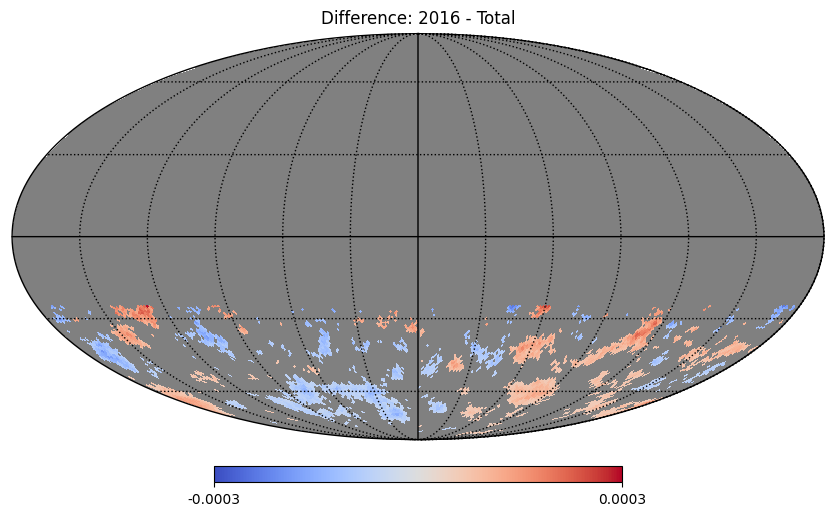

3.440644205251263e-05
0.00010335905625370713


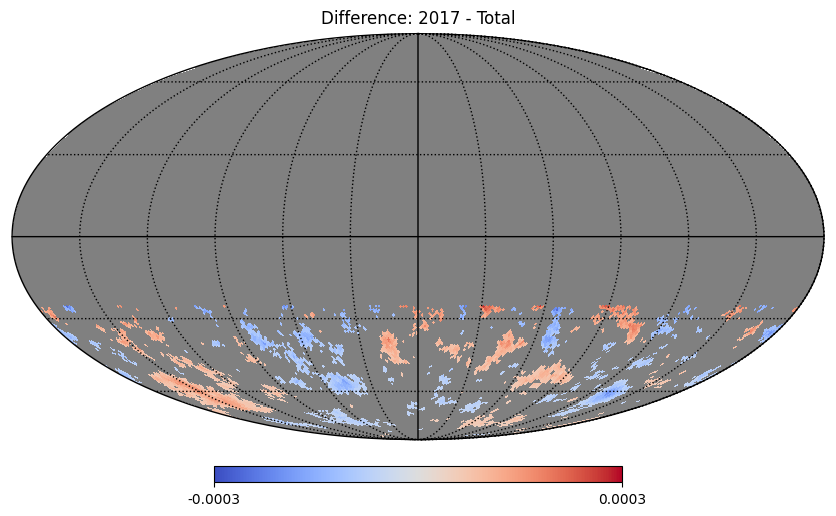

3.4389918702128714e-05
0.00010333962160764967


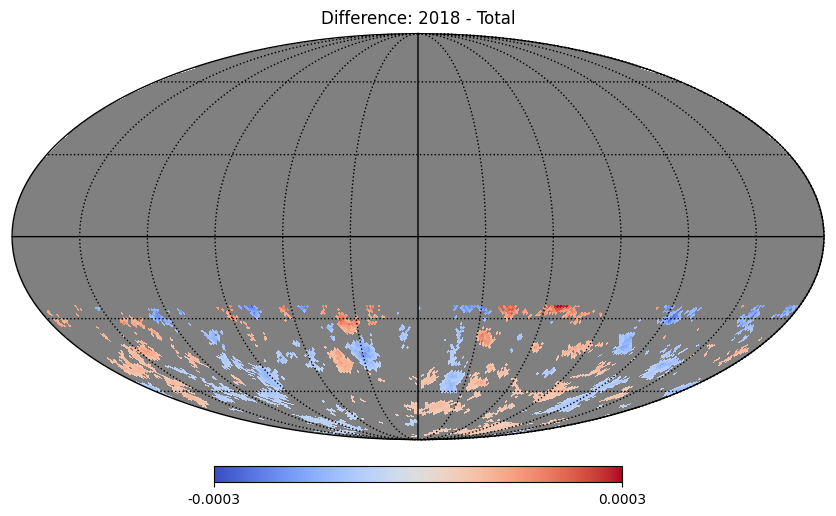

3.424673132712398e-05
0.00010284656147186332


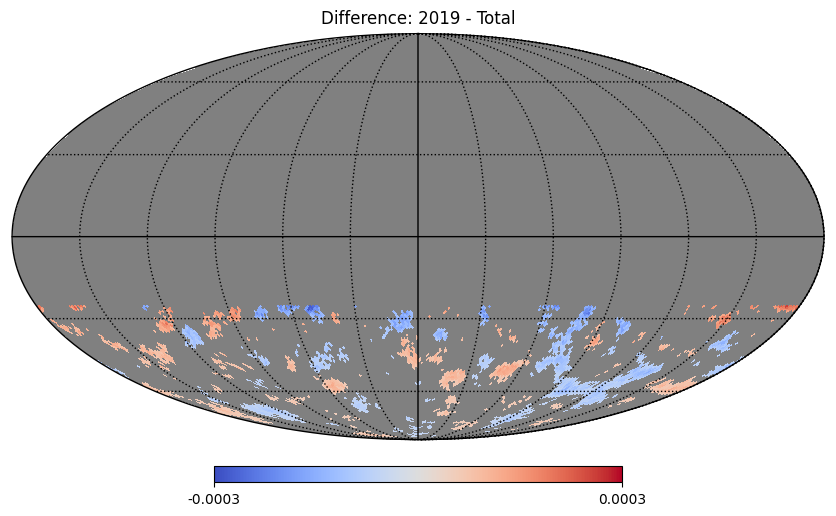

3.43786756354909e-05
0.00010335839182482077


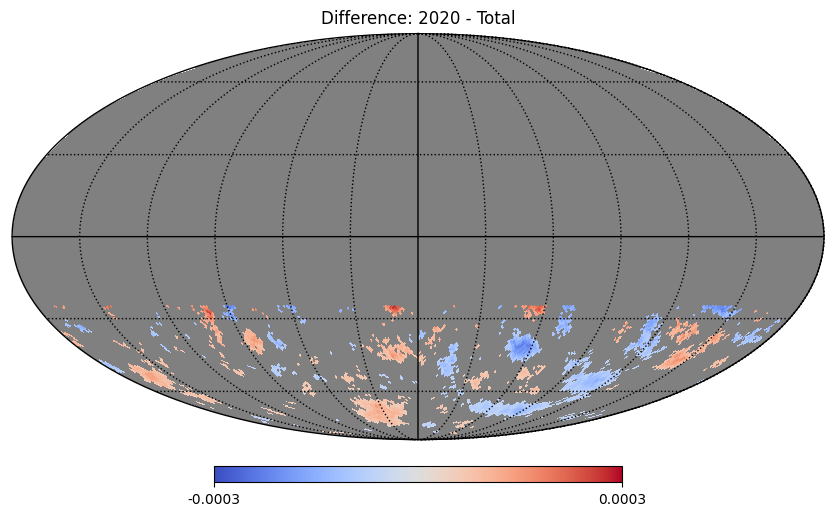

3.436539129854668e-05
0.00010339068910308695


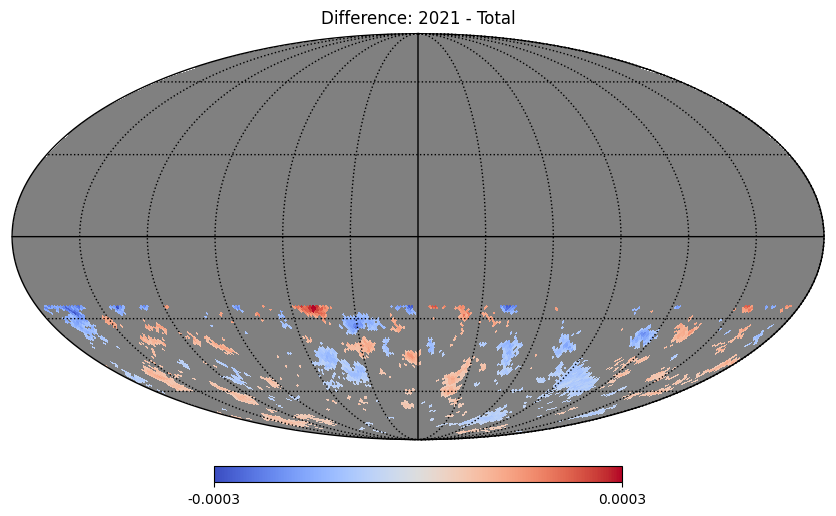

3.4365349649040875e-05
0.00010338545820262953


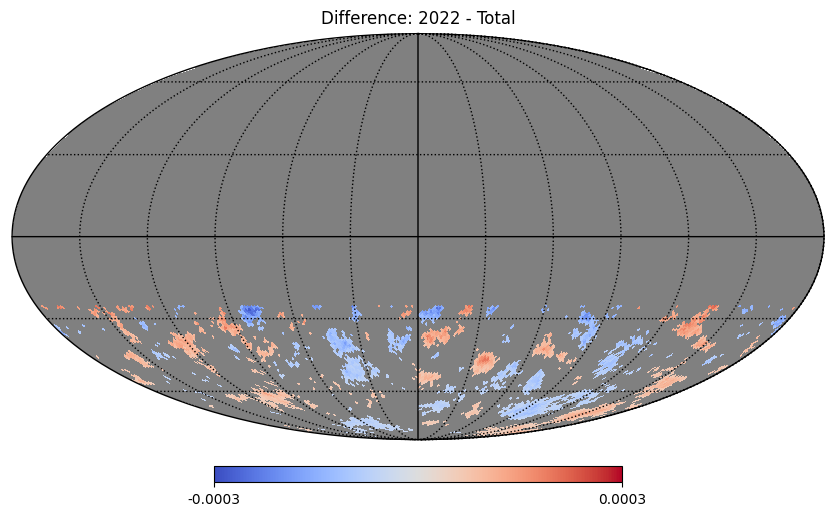

In [2]:
def make_difference_maps_with_error(start_year=2012, end_year=2022):
    # for the total year map and the error
    total_map_path = f'/data/user/fmcnally/anisotropy/maps/merged/IC86_N10_sid.fits'
    total_map = getMap([total_map_path], mapName='relint', smooth=5, verbose=False, mask=True)
    total_relerr_map = getMap([total_map_path], mapName='relerr', smooth=5, verbose=False, mask=True)

    for year in range(start_year, end_year + 1):
        yearly_map_path = f'/data/user/fmcnally/anisotropy/maps/merged/IC86-{year}_N10_sid.fits'
        current_map = getMap([yearly_map_path], mapName='relint', smooth=5, verbose=False, mask=True)
        relerr_map = getMap([yearly_map_path], mapName='relerr', smooth=5, verbose=False, mask=True)

        print(relerr_map[relerr_map!= hp.UNSEEN].min())
        print(relerr_map.max())

        # for the difference map:yearly-total
        diff_map = current_map - total_map
        diff_map[diff_map == 0] = hp.UNSEEN

        # to add relative errors
        summed_relerr_map = relerr_map + total_relerr_map

        # the significance
        significance_map = np.zeros_like(diff_map)
        significance_map[np.abs(diff_map) > summed_relerr_map] = 1

        # for error map
        error_map = diff_map * significance_map
        error_map[error_map == 0] = hp.UNSEEN

        
        hp.mollview(error_map, min=-0.0003, max=0.0003, title=f'Difference: {year} - Total', cmap='coolwarm')
        hp.graticule()
        plt.savefig(f'diff_{year}_total.png', dpi=200, bbox_inches='tight')
        plt.show()
make_difference_maps_with_error()
